# Price of a House Prediction using Regression Models

## 1.0 Business and Problem Understanding

### Background

Hass Consulting Company which is a real estate leader with over 25 years of experience. The company has information on real estate properties that was collected over the past few months

### Problem
- Study the factors that affect housing prices using the provided dataset.
- Create a model to accurately predict the sale price from the predictor variables.


### Features


1. Price  - Price of the house. The dependent feature we seek to predict.
2. Id - Unique identifier
3. bedrooms - Number of Bedrooms in the house
4. bathrooms - Number of Bathrooms in the house.
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode os the house
16. lat : Latitude of the house
17. lon : Longitude of the house
18. sqft_living15
19. sqft_lot15

Metric for success

In [18]:
##

Context

Experimental design

## 2.0 Libraries and Data Importation

In [50]:
## Import Libraries
# Data Manipulation
import pandas as pd
import numpy as np
import math
# import pandas_profiling
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Suppress scientific notation

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
#Improving the appearance of graphs
sns.set(rc={'figure.figsize':
# Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, Lasso
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Import Dataset
df_house = pd.read_csv('house_data.csv')

## 3.0 Data Exploration

In [21]:
# Check Sample Dataset: Objective: Understanding of data columns
df_house.sample(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16961,5538300225,405000.000,4,1.750,2180,13529,1.000,0,0,3,7,1090,1090,1956,0,98155,47.752,-122.294,2000,13529
21313,8562770050,627000.000,3,3.500,2710,3475,2.000,0,0,3,8,1650,1060,2005,0,98027,47.536,-122.072,2440,2867
3944,3584900090,577000.000,3,1.750,1760,12874,1.000,0,0,4,7,1230,530,1967,0,98005,47.591,-122.167,1950,10240
14675,2051200506,390000.000,3,1.000,1190,85226,1.500,0,0,5,5,1190,0,1935,0,98070,47.365,-122.462,1360,46960
9137,7312200040,560000.000,4,2.500,1790,9787,1.000,0,2,4,8,1240,550,1983,0,98056,47.534,-122.189,1790,9787


In [22]:
# Check number of columns and rows
df_house.shape

(21613, 20)

Notes: There are 21,613 records and 20 columns

In [23]:
# Check Columns and their data types
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


All columns are of numeric of type integer and float. No string columns noted.

In [24]:
#Check statistical summary of the dataset

df_house.describe(include ='all')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540182.159,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367362.232,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [25]:
#Missing Data
df_house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing data in the dataset noted

In [26]:
# Outliers
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    
    plt.show()

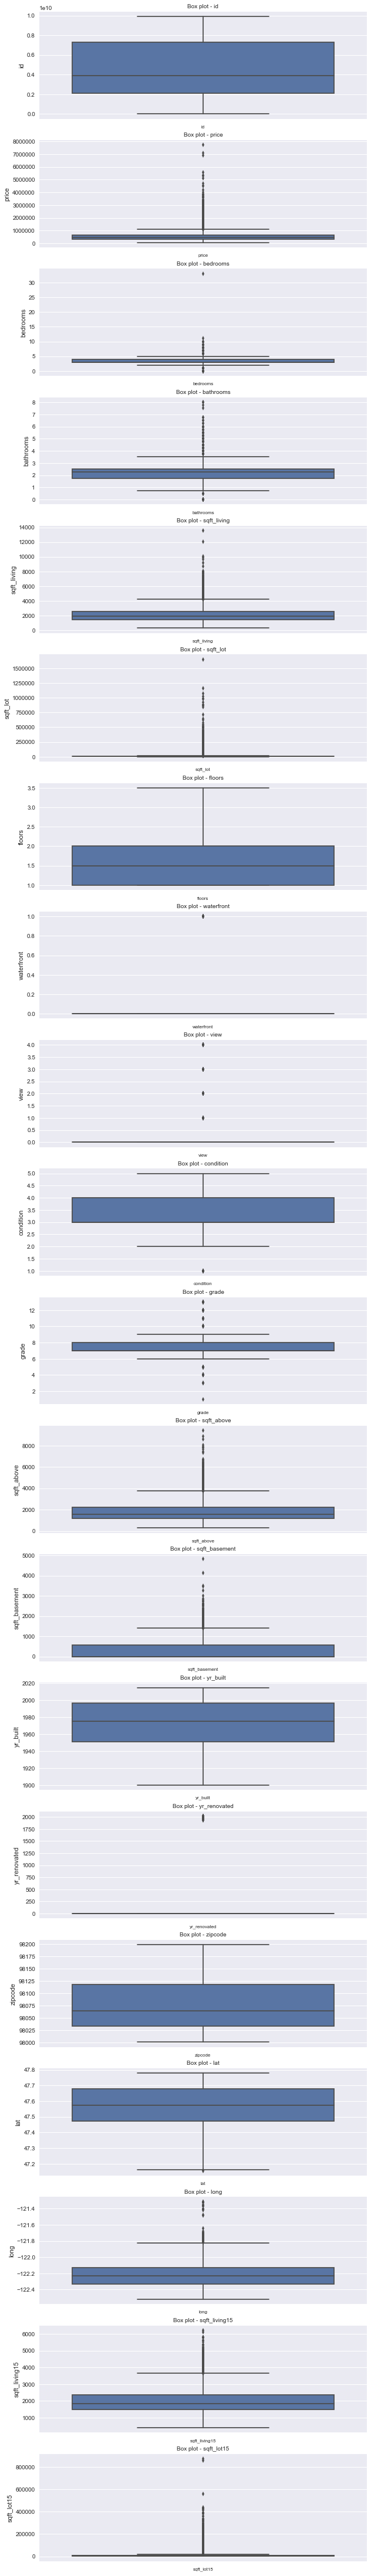

In [27]:
#Execute the function
col_names = df_house.columns
target_dataframe = df_house

plot_boxplots(target_dataframe,col_names)

Price, bedrooms, bathrooms, sqft living, sqft lot, waterfront,view,grade, sqft_above, sqft_basement , yr_renovated, long, sqft_living15, sqft_lot15 all noted to have outliers.

The outliers will not be dropped as they are business related important data. However, the impact of outliers on the model to be analyzed.

## 3.0 Data Analysis

### 3.1 Univariate Analysis

#### Distribution of variables

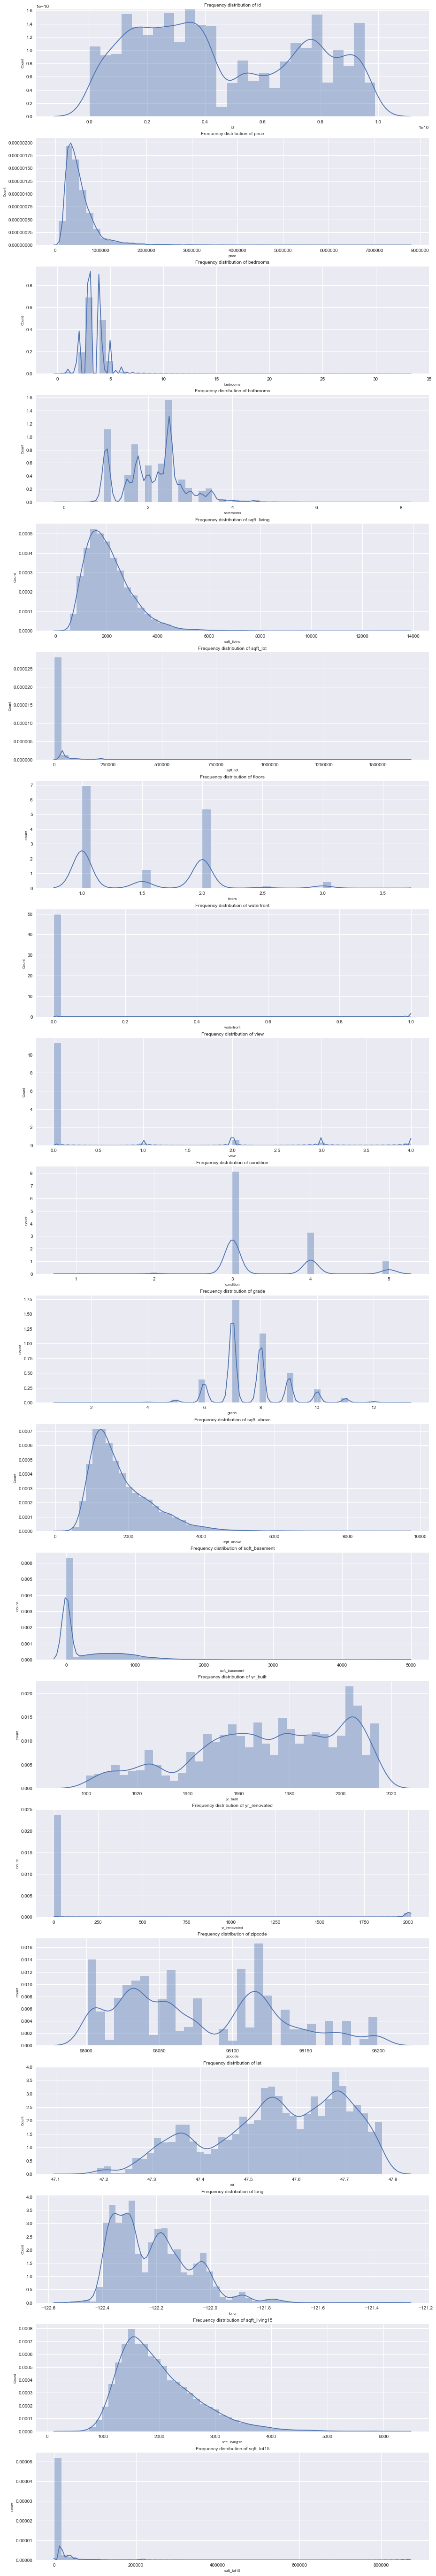

In [28]:
# Variables Distributions
col_names = df_house.columns
fig, ax = plt.subplots(len(col_names), figsize=(15,100))

for i, col_val in enumerate(col_names):

    sns.distplot(df_house[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

a) Floor

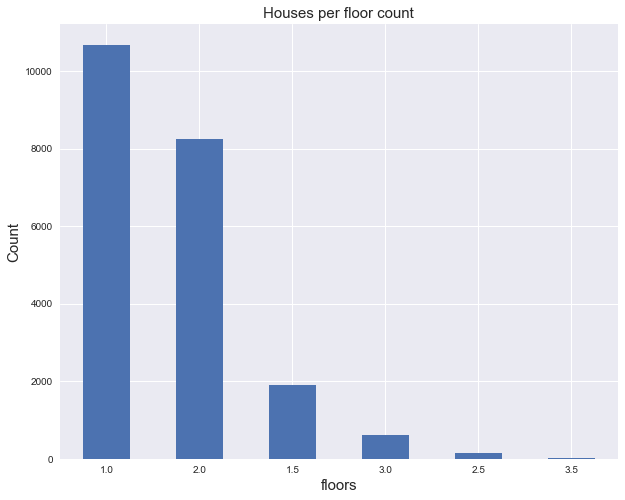

In [74]:
df_house['floors'].value_counts().plot.bar(rot =0)
plt.xlabel("floors", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per floor count",fontsize=15)
plt.show()

b) Houses per Condition

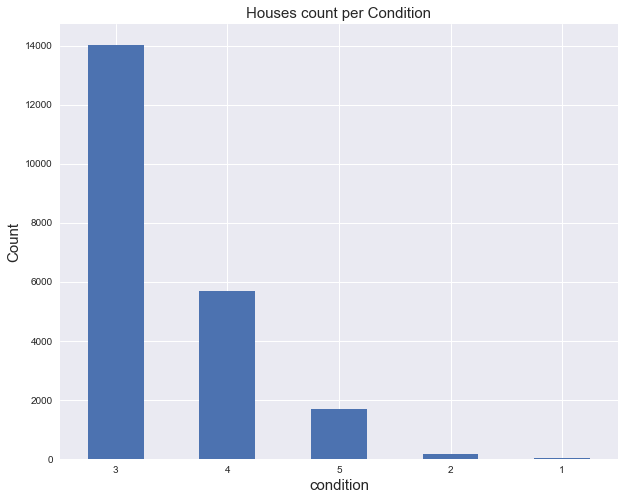

In [30]:
df_house['condition'].value_counts().plot.bar(rot =0)
plt.xlabel("condition",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses count per Condition",fontsize=15)
plt.show()

c) Grade

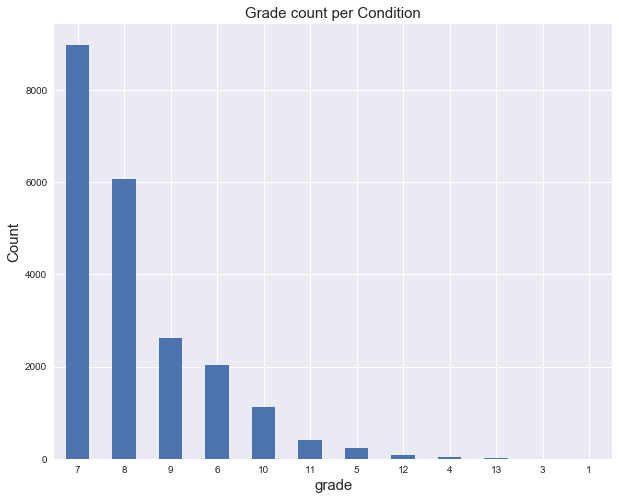

In [31]:
df_house['grade'].value_counts().plot.bar(rot =0)
plt.xlabel("grade",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Grade count per Condition",fontsize=15)
plt.show()

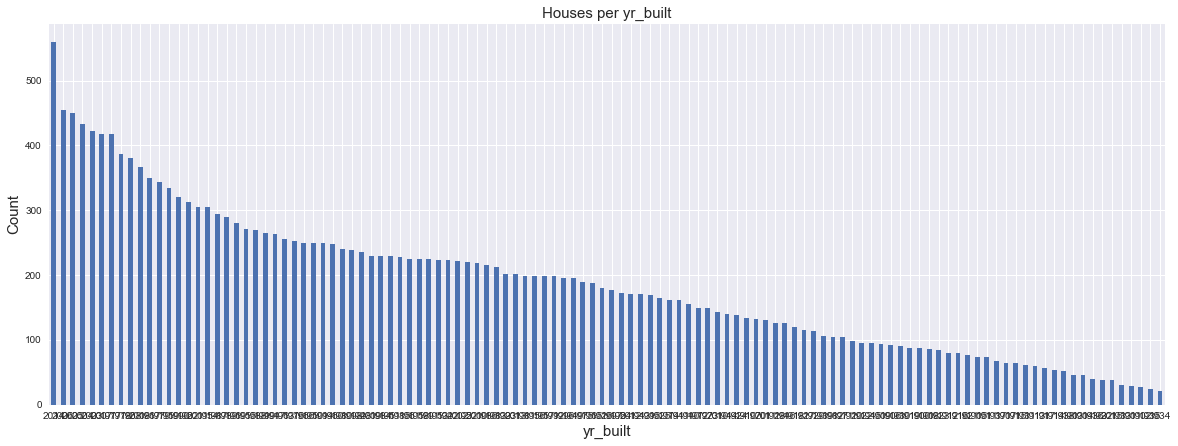

In [32]:
plt.figure(figsize = (20,7))
df_house['yr_built'].value_counts().plot.bar(rot =0)
plt.xlabel("yr_built",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per yr_built",fontsize=15)
plt.show()

### 3.2 Bi-Variate Analysis

a) Bedrooms against Price

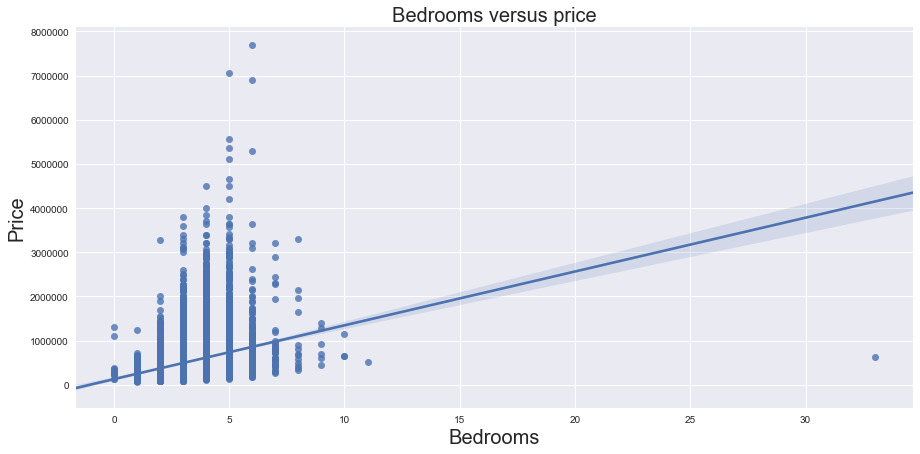

In [33]:
#Scatter plot to check for any correlation between bedrooms and price
plt.figure(figsize = (15,7))
sns.regplot(df_house['bedrooms'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Bedrooms',fontsize = 20)
plt.title('Bedrooms versus price',fontsize = 20)
plt.show()

Increase in rooms largely result to increase in price. 
However, from eight bedrroms and above, the price increase is not noted. Outlier exist at about 34 bedrooms.

b) Condition against Price

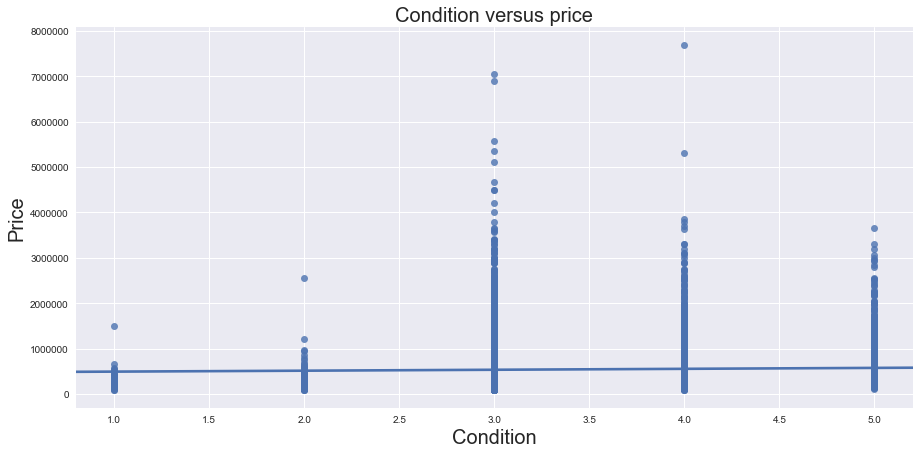

In [34]:
#Scatter plot to check for any correlation between House Condition and Price
plt.figure(figsize = (15,7))
sns.regplot(df_house['condition'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Condition',fontsize = 20)
plt.title('Condition versus price',fontsize = 20)
plt.show()

Houses with higher condition have higher prices. The meaning of condition is not provided in dataset but from above pattern, we can infer that 5 is best condition and 1 is poor.

c) Condition against grade

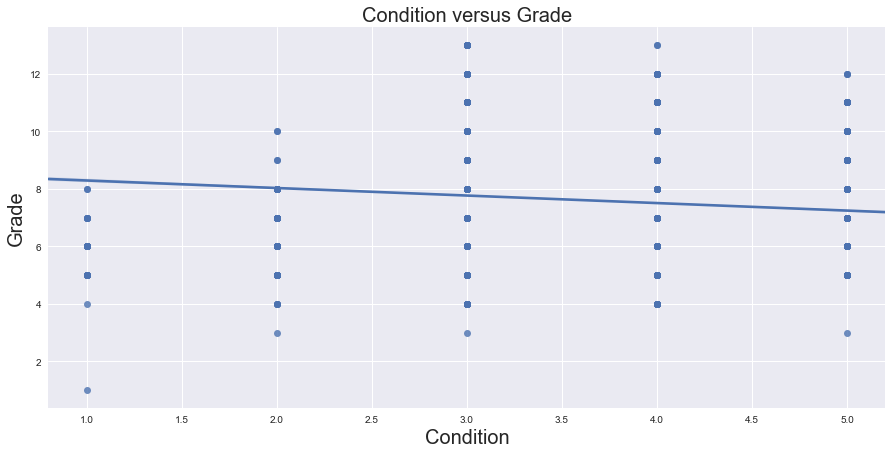

In [35]:
#Scatter plot to check for any correlation between House Condition and grade
plt.figure(figsize = (15,7))
sns.regplot(df_house['condition'],df_house['grade'])
plt.ylabel('Grade',fontsize = 20)
plt.xlabel('Condition',fontsize = 20)
plt.title('Condition versus Grade',fontsize = 20)
plt.show()

d) Is price affected by number of bathrooms?

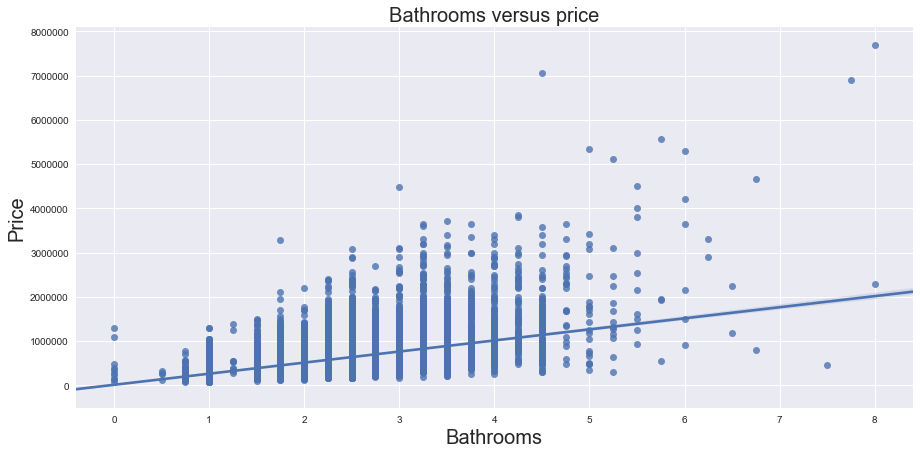

In [36]:
#Scatter plot to check for any correlation between bathrooms and Price
plt.figure(figsize = (15,7))
sns.regplot(df_house['bathrooms'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Bathrooms',fontsize = 20)
plt.title('Bathrooms versus price',fontsize = 20)
plt.show()

Increase in bathrooms has a positive correlation with price

e) Is price affected by floor?

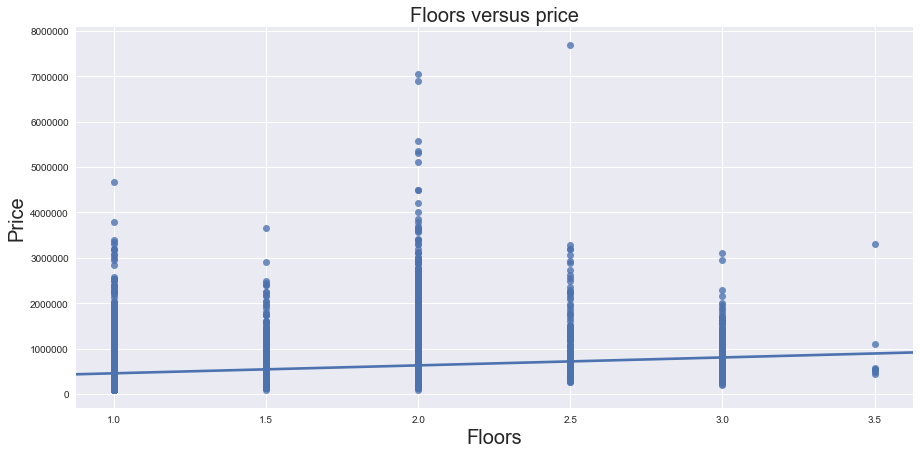

In [37]:
#Scatter plot to check for any correlation between floors and Price
plt.figure(figsize = (15,7))
sns.regplot(df_house['floors'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Floors',fontsize = 20)
plt.title('Floors versus price',fontsize = 20)
plt.show()

Marginal increase in price as proce increases. 
There is need to interrogate the data source/originators to understand why there is 1.5, 2.5 and 3.5 floor counts which is contrally to standard reasoning where floor numbers are whole numbers only.

### 3.4 Correlation

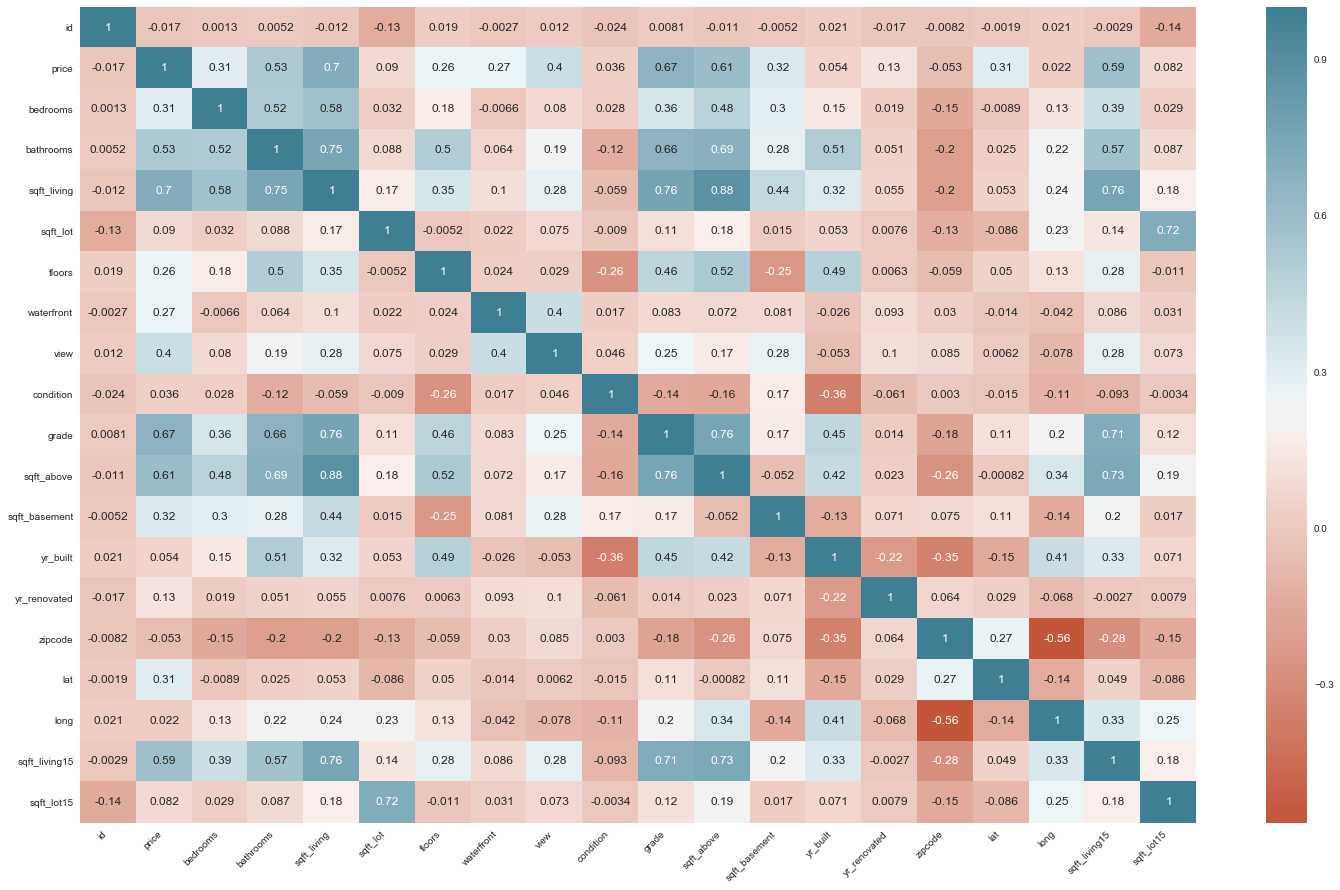

In [38]:
##### corr = df_house.corr()
# ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=256),square=True,annot = True)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

plt.figure(figsize = (25,15))
ax = sns.heatmap(df_house.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

Observations.
- Price has strong positive correlation with sqft_living(0.7),grade(0.67),sqft_above(0.61)
- Price has weak correlation with sqft_lot, yr_built, yr, renovated, zip code,longitude and sqft_lot15

## 4.0 Regression Analysis

#### Multi-collineality

#### Prepare Test, Train Data

#### a) Multiple Linear Regression

In [39]:
# Define X and y columns
X = df_house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 
              'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
              'sqft_living15', 'sqft_lot15']]
y = df_house['price']

# Fit
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train and test dataset. 20% split ratio applied. Random state activated
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 31)

In [42]:
# Creating our baseline regression model
# This is a model that has no regularization to it
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
lr_coeff = regression.coef_
# Mean Square Error1

mlr_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred),2)
mlr_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
mlr_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Mean Absolute Error=",mlr_meanAbsError)
print("Mean Squared Error=",mlr_meanSqrdError)
print("Root Mean Squared Error=",mlr_rootMeanSqrdError)

print("R2 scoring is ",round(r2_score(y_test, y_pred),2))


Mean Absolute Error= 127077.38
Mean Squared Error= 43062274220.05
Root Mean Squared Error= 207514.52
R2 scoring is  0.69


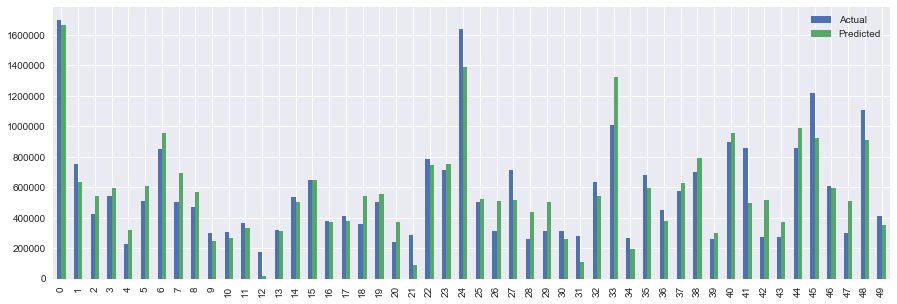

In [43]:
df_actual_pred = pd.DataFrame({"Actual":np.array(y_test),"Predicted":y_pred})
df_actual_pred[:50].plot(figsize=(15,5),kind='bar')
plt.show()

Residual Plots and heteroskedasticity using Barlett's test.

Observations

#### b) Quantile Regression

Observations

Limitations

#### c) Ridge Regression

Step 1: Get Best Alpha using GridSearch Cross Validation

In [44]:
#Instantiate ridge and perform cross valdiation to obtain the optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-10,2,8)}
                      ,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.0007196856730011514}

Step 3: Ridge with best Alpha

In [46]:
#Train the model
ridge = Ridge(normalize=True,alpha=0.0007196856730011514)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

# Model Erros
ridge_meanAbsError=mean_absolute_error(y_test,y_pred)
ridge_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
ridge_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Mean Absolute Error=",ridge_meanAbsError)
print("Mean Squared Error=",ridge_meanSqrdError)
print("Root Mean Squared Error=",ridge_rootMeanSqrdError)

#Model Score
print("R2 scoring is ",round(r2_score(y_test, y_pred),2))

Mean Absolute Error= 122308.94514381839
Mean Squared Error= 39760054498.47
Root Mean Squared Error= 207514.52
R2 scoring is  0.71


#### d) Lasso Regression

In [54]:
## Split the train, test dataset and using Grid CV, get the best alpha parameter.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso() 

gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train,y_train)
gridlasso.best_params_

{'alpha': 24.0}

In [62]:
## Fitting Lasso model using Alpha above and print the best parameters, R-squared scores, MSE, and coefficients
lasso = Lasso() 

#Train the model
lasso = Lasso(normalize=True,alpha=24.0)
lasso.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

# Model Errors
lasso_meanAbsError=mean_absolute_error(y_test,y_pred)
lasso_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
lasso_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Mean Absolute Error=",lasso_meanAbsError)
print("Mean Squared Error=",lasso_meanSqrdError)
print("Root Mean Squared Error=",ridge_rootMeanSqrdError)

#Model Score
print("Lasso R2 scoring is ",round(r2_score(y_test, y_pred),2))

## Compare the magnitude of coefficients against Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train) 
y_pred_lr = linear.predict(X_test)
print("linear coef:", lasso.coef_)
print("linear coef:", linear.coef_)

Mean Absolute Error= 122308.94514381839
Mean Squared Error= 39760054498.47
Root Mean Squared Error= 207514.52
Lasso R2 scoring is  0.71
linear coef: [-23164.5470904   22613.73834988 137745.80986466      0.
   1719.52009714  46450.56122717  39258.44041062  15772.74545089
 115779.76223607  20150.6529527       0.         -69718.98422217
   6150.14026847 -22928.86980018  80488.79401524 -24628.08902532
  13551.49790902  -2493.478709  ]
linear coef: [-3.22960336e+04  2.72118460e+04  1.71525443e+18  6.30558128e+03
  5.21851466e+03  4.79551099e+04  3.97151063e+04  1.84603321e+04
  1.14482390e+05 -1.54651946e+18 -8.26540724e+17 -7.62880000e+04
  7.42400000e+03 -3.17440000e+04  8.38400000e+04 -3.12320000e+04
  1.57440000e+04 -1.04960000e+04]


#### e) Elastic Net Regression

Determine elastic search coefficient

In [73]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)
search.best_params_
abs(search.best_score_)

40995654728.69378

In [72]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)

# Model Errors
lasso_meanAbsError=mean_absolute_error(y_test,y_pred)
lasso_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
lasso_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Mean Absolute Error=",lasso_meanAbsError)
print("Mean Squared Error=",lasso_meanSqrdError)
print("Root Mean Squared Error=",ridge_rootMeanSqrdError)

#Model Score
print("Elastic Net R2 scoring is ",round(r2_score(y_test, y_pred),2))

Mean Absolute Error= 231479.5420092697
Mean Squared Error= 136632807767.61
Root Mean Squared Error= 207514.52
Elastic Net R2 scoring is  -0.0
